In [3]:
library(readr)
library(ggplot2) 
library(dplyr)
library(treemap)
library(tidyr)
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v stringr 1.4.0
v purrr   0.3.2     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
install.packages("treemap")

also installing the dependencies 'gridBase', 'igraph'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
igraph   1.2.6  1.3.2              TRUE
treemap  2.4-2  2.4-3             FALSE

  Binaries will be installed
package 'gridBase' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Vikra\AppData\Local\Temp\RtmpoTWIGm\downloaded_packages


installing the source package 'treemap'



In [4]:
match<-read.csv("IPLL.csv")


In [5]:
deliveries<-read.csv("deliveries.csv")


In [6]:
match=match[,-c(1,19)]


In [7]:
head(match)

id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
2,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
3,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
4,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
5,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
6,2008,Jaipur,21-04-2008,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin


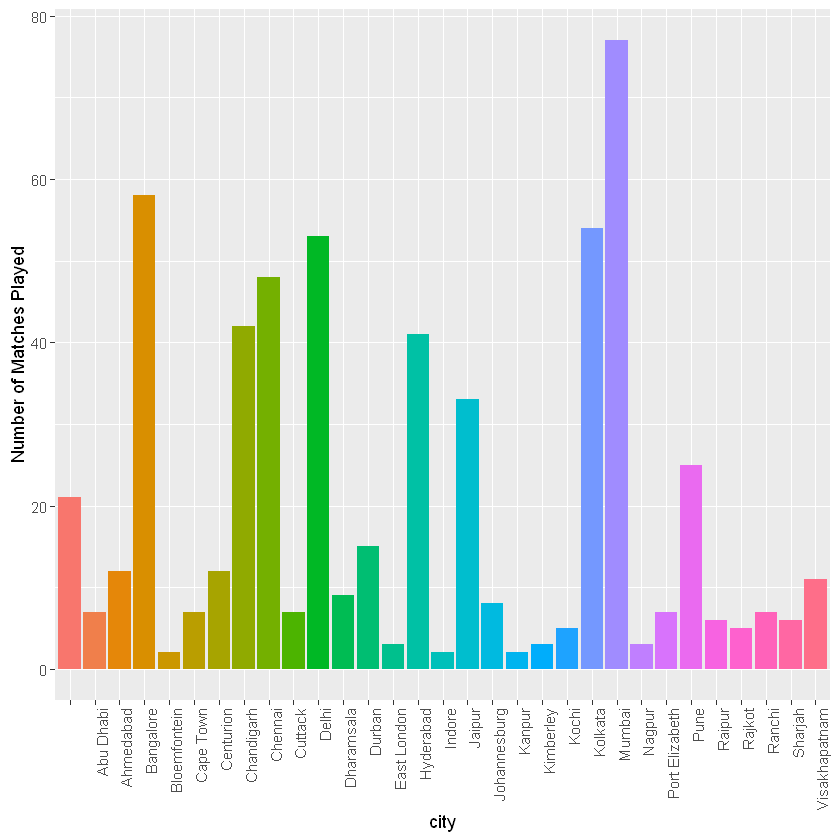

In [8]:
#Matches played in different cities 
ggplot(match[which(!is.na(match$city)),],aes(city,fill= city,rm.na=T)) +geom_bar() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
  ylab("Number of Matches Played") +
 guides(fill=FALSE)

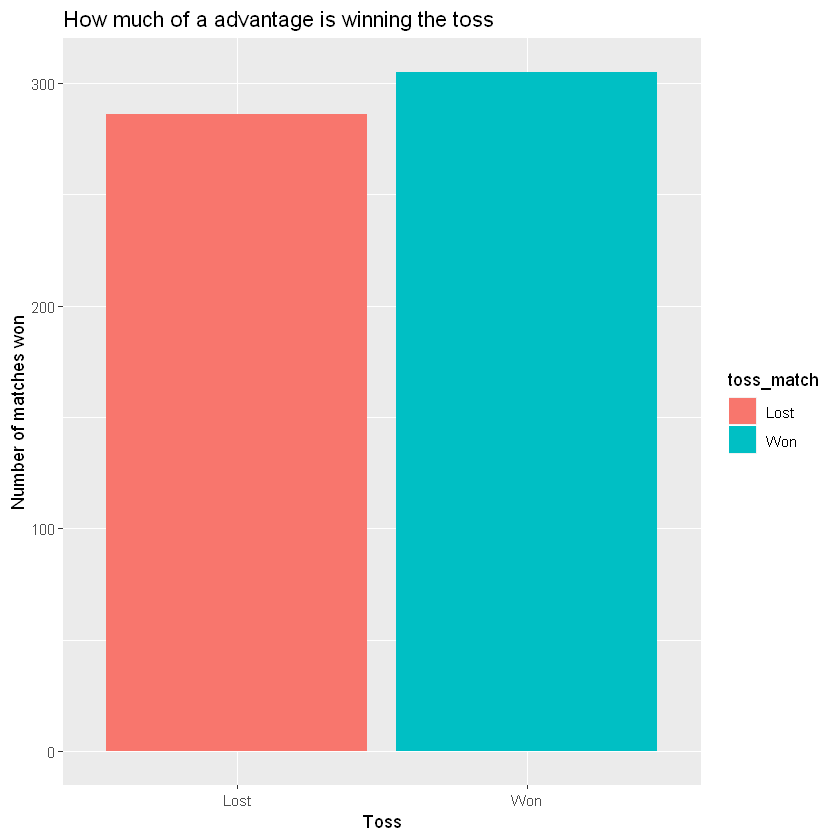

In [9]:
#IS WINNING TOSS IN IPL HAS ADVANTAGE
match$toss_match<-ifelse(as.character(match$toss_winner)==as.character(match$winner),"Won","Lost")
ggplot(match[which(!is.na(match$toss_match)),],aes(toss_match, fill = toss_match))+ 
  geom_bar()+ xlab("Toss") +ylab("Number of matches won")+ ggtitle("How much of a advantage is winning the toss")

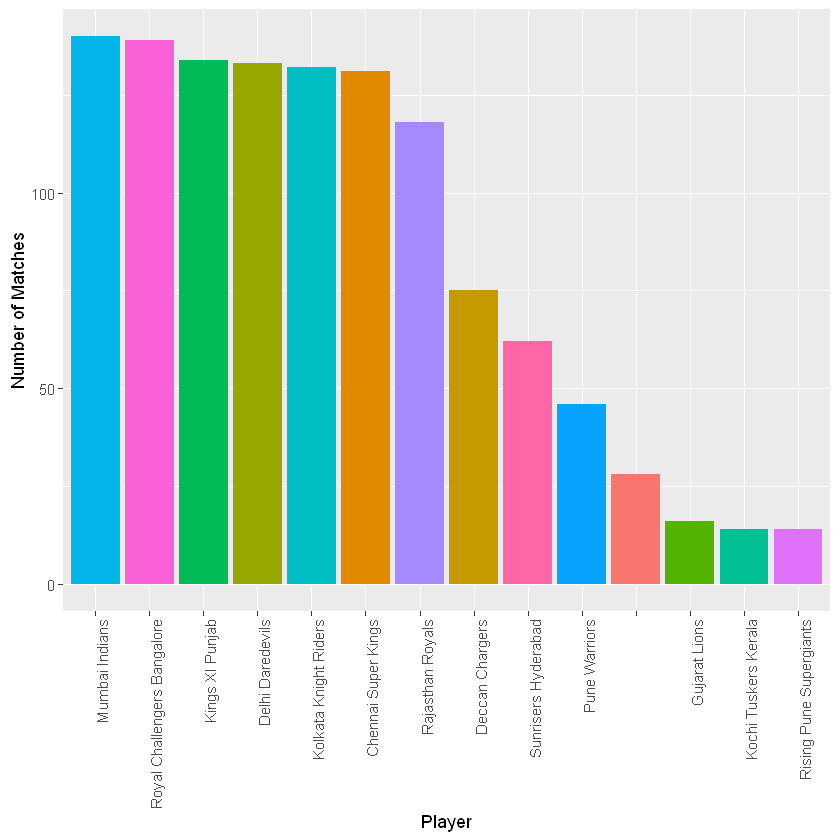

In [10]:
#NUMBER OF MATCHES PLAYED BY EACH TEAM
ggplot(as.data.frame(table(match$team2) + table(match$team1)),aes(reorder(Var1,-Freq),Freq,fill = Var1)) +
  geom_bar(stat = "identity")+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ylab("Number of Matches") +guides(fill=FALSE)

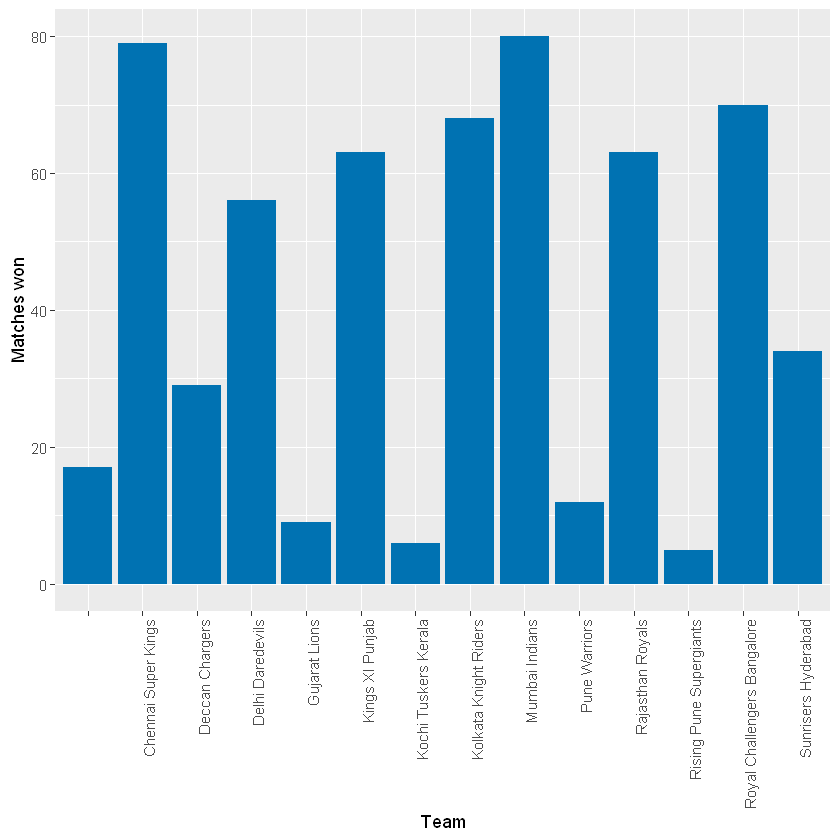

In [11]:
#NUMBER OF MATCHES WON BY EACH TEAMS
ggplot(match,aes(winner)) +geom_bar(fill="#0072B2") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
  ylab("Matches won")

In [14]:
Data<-match[match$season!="2009",]

In [17]:
Data1<-Data[ Data$date < as.Date("2008-04-16") ,]


Warning message in `[.data.frame`(Data, Data$date < as.Date("2008-04-16"), ):
"Incompatible methods ("Ops.factor", "<.Date") for "<""

In [18]:
Data1$home_team[Data1$city=="Bangalore"]<- "Royal Challengers Bangalore"
Data1$home_team[Data1$city=="Chennai"]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Delhi"]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Chandigarh"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Jaipur"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Mumbai"]<- "Mumbai Indians"
Data1$home_team[Data1$city=="Kolkata"]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Kochi"]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season <=2012]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season >2012]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ahmedabad"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Dharamsala"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Visakhapatnam" & Data1$season== 2015]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ranchi" & Data1$season== 2013]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Ranchi" & Data1$season > 2013]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Rajkot" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Kanpur" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Raipur" ]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Nagpur" ]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Indore" ]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Pune" & Data1$season!= 2016]<- "Pune Warriors"
Data1$home_team[Data1$city=="Pune" & Data1$season== 2016]<- "Rising Pune Supergiants"

In [19]:
Data1<-Data1[ which(!is.na(Data1$home_team)),]
Data1$win_host <- ifelse(as.character(Data1$winner)==as.character(Data1$home_team),"Home","Away")

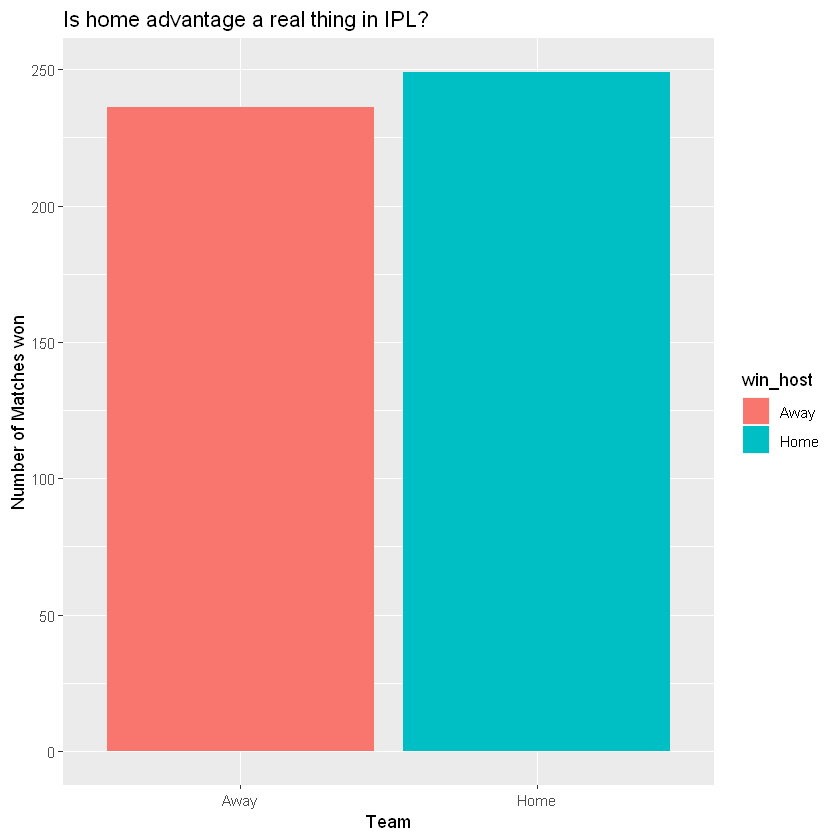

In [20]:
# HOME ADVANGE IS A REAL THING IN IPL HISTORY 
ggplot(Data1[which(!is.na(Data1$win_host)),],aes(win_host,fill= win_host))+geom_bar()+
  ggtitle("Is home advantage a real thing in IPL?")+
  xlab("Team")+
  ylab("Number of Matches won")+labs(aesthetic="Winner")

Joining, by = "Var1"


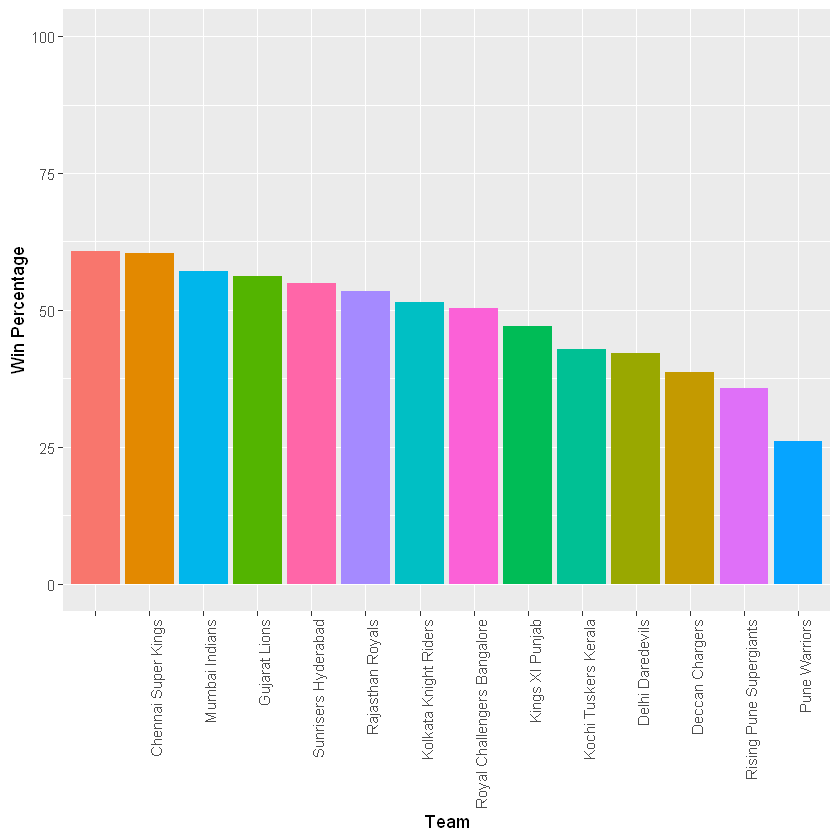

In [21]:
matches_won<-as.data.frame(table(match$winner))
colnames(matches_won)[2]<-"Won"
matches_played<-as.data.frame(table(match$team2) + table(match$team1))
colnames(matches_played)[2]<-"Played"
#WINNING PERCENTAGE OF EACH TEAM
ggplot(left_join(matches_played,matches_won ),aes(reorder(Var1,-Won/Played),Won*100/Played,fill = Var1)) +geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
  ylab("Win Percentage") +  guides(fill=FALSE)+coord_cartesian(ylim = c(0, 100))

In [22]:
df<- deliveries %>% group_by(batsman)%>% summarise(runs=sum(batsman_runs)) %>% arrange(desc(runs)) %>%
  filter(runs > 2000)

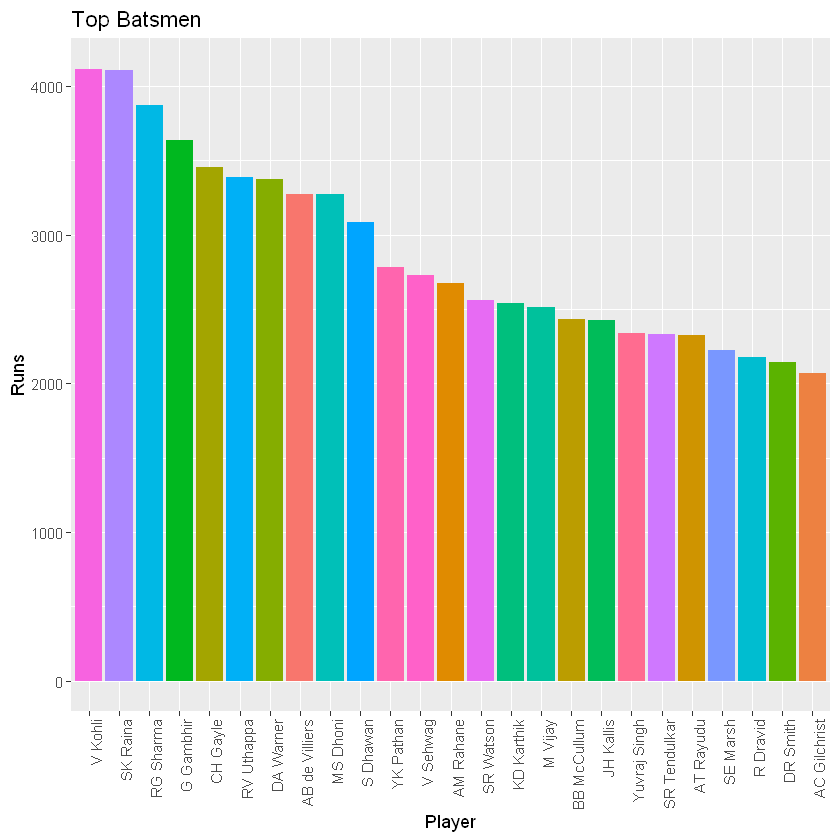

In [23]:
# TOP BATSMAN IN IPL
df %>% ggplot(aes(reorder(batsman,-runs),runs,fill=batsman)) +geom_bar(stat = "identity") +xlab("Batsman")+ 
  ylab("Runs")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  xlab("Player")+ ggtitle("Top Batsmen")+ guides(fill=F)

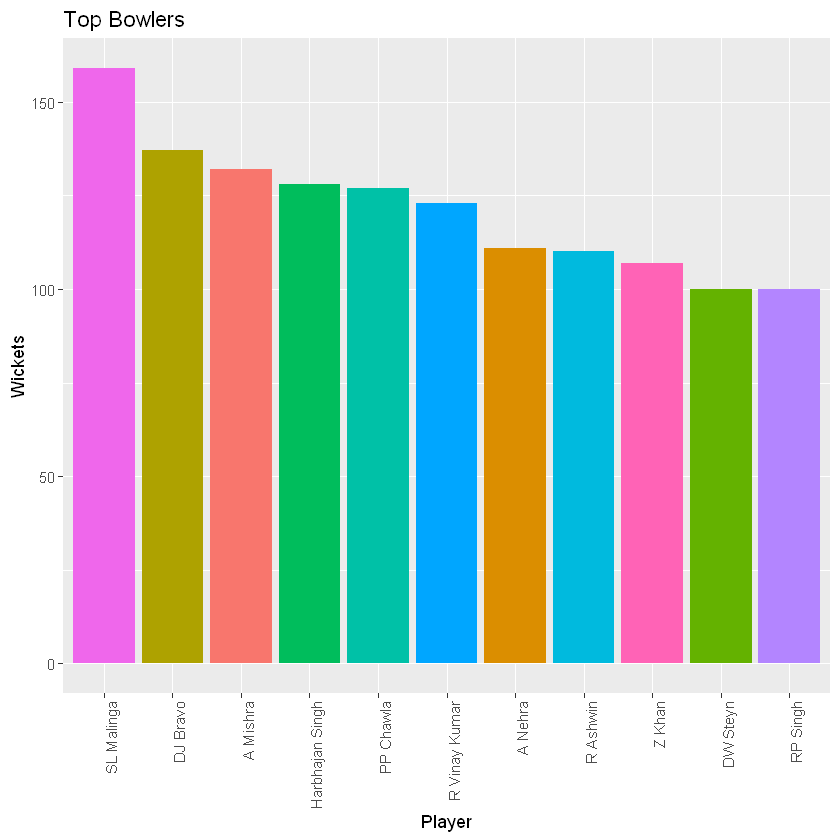

In [24]:
#TOP BOWLER IN IPL
df<-deliveries %>% group_by(bowler) %>% filter(player_dismissed!="") %>% 
    summarise(wickets= length(player_dismissed)) %>% top_n(n=10,wt=wickets) 
df %>% ggplot(aes(reorder(bowler,-wickets),wickets,fill=bowler))+geom_bar(stat = "identity") +
    ylab("Wickets")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ ggtitle("Top Bowlers")+ 
    guides(fill=F)

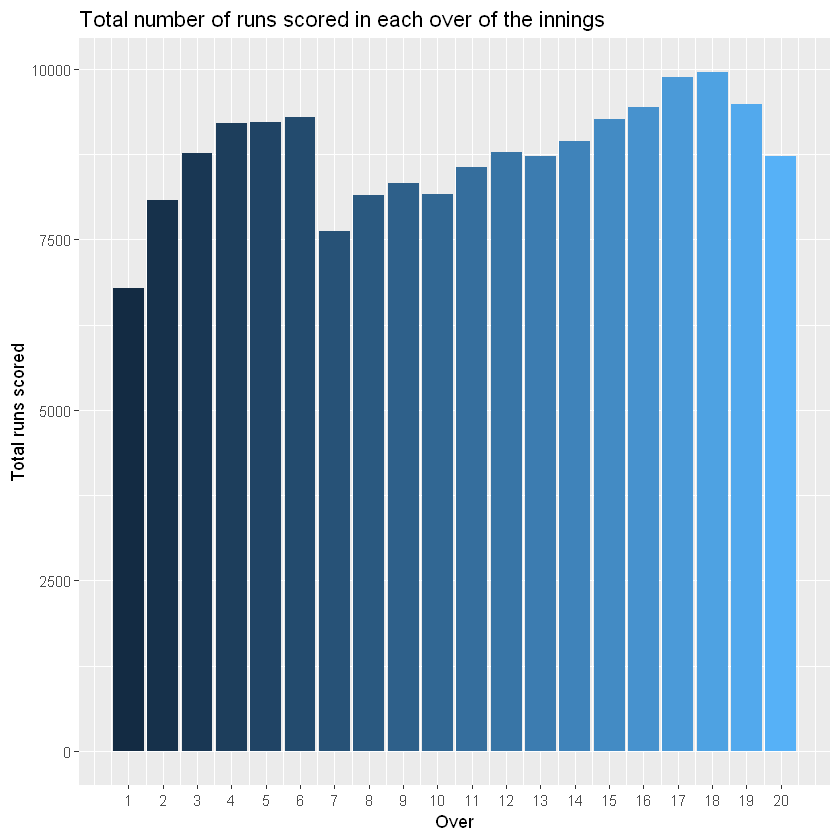

In [25]:
#TOTAL RUNS SCORED IN EACH OVER OF INNINGS
df <- deliveries %>% group_by(over) %>% filter(is_super_over==0) %>% summarise(Runs= sum(total_runs))

df %>% ggplot(aes(over,Runs,fill=over))+geom_bar(stat = "identity")+scale_x_continuous(breaks = 1:20)+ 
    guides(fill=F) +xlab("Over") + ylab("Total runs scored") +
    ggtitle("Total number of runs scored in each over of the innings")

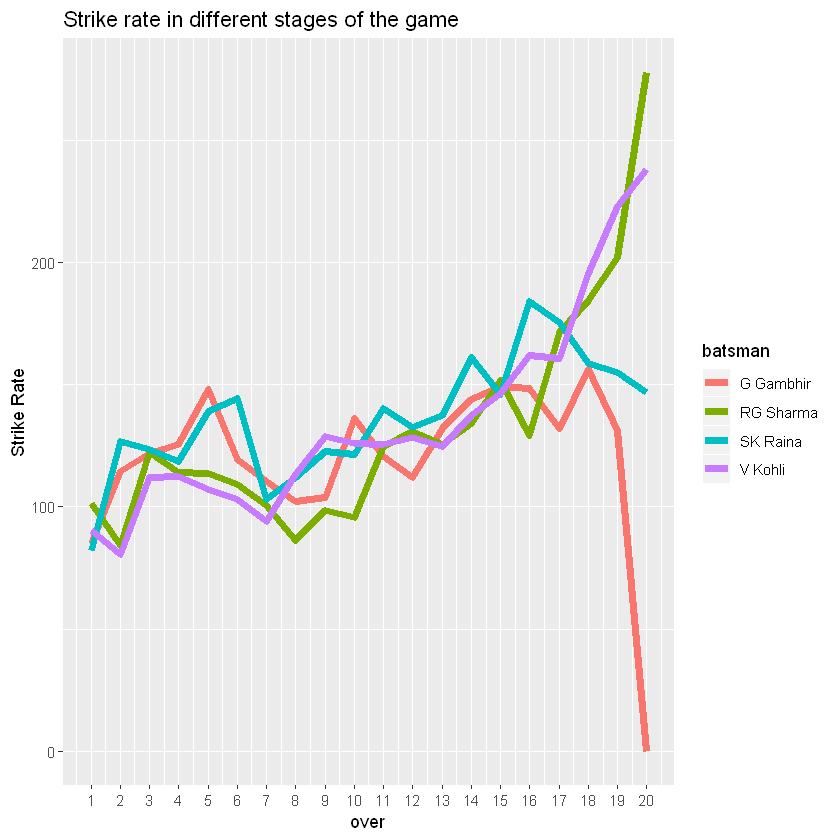

In [26]:
#STRIKE RATE OF TOP GETTERS AT DIFFERENT STAGES OF THE GAME
deliveries %>% 
  filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
  group_by(batsman,over) %>% summarise(strike= mean(batsman_runs)*100) %>%  
  ggplot(aes(over,strike, col=batsman)) + geom_line(size=2) + ylab("Strike Rate") + 
  ggtitle("Strike rate in different stages of the game ") + scale_x_continuous(breaks = 1:20)